In [1]:
import pandas as pd
import geopandas as gpd
from preprocess.functions.lat_lon_to_utm import convertLV95, convertLatLon
import matplotlib.pyplot as plt
import os
print(os.getcwd())

/Users/jburger/Documents/Promotion/21_Network_model/Energy-Carbon-Optimization-Platform/preprocess


In [2]:
kva_locs = pd.read_csv('../../../20_Models_and_data/KVA_data/WasteIncinerationPlant.csv', delimiter=';')

In [3]:
coords_list = []

for i in range(kva_locs.shape[0]):
    x_wgs84, y_wgs84 = convertLV95(kva_locs.loc[i, 'x_lv95'], kva_locs.loc[i, 'y_lv95'])
    utm_df = convertLatLon(pd.DataFrame([[x_wgs84, y_wgs84]], columns=['lon', 'lat']))
    coords_list.append([kva_locs.loc[i, 'Abbreviation'], x_wgs84, y_wgs84, utm_df.loc[0, 'x[m]'], utm_df.loc[0, 'y[m]']])

coords_df = pd.DataFrame(coords_list, columns=['Abbreviation', 'x_wgs84', 'y_wgs84', 'x_utm', 'y_utm'])

In [8]:
kva_locs = kva_locs.merge(right=coords_df, how='inner')

In [9]:
kva_nodes = kva_locs[['Abbreviation', 'x_utm', 'y_utm']].copy(deep=True)
kva_nodes.columns = ['node', 'x', 'y']
kva_nodes.at[:, ['x', 'y']] = kva_nodes.loc[:, ['x', 'y']]*0.001

In [14]:
kva_nodes.to_csv('../data/NUTS0_CCTS/setNodes/setKVANodes.csv', index=False)

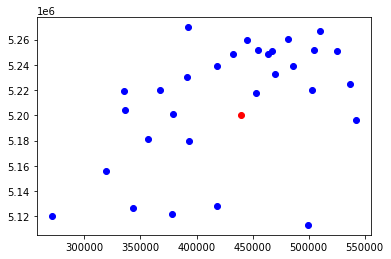

In [8]:
# from here on, just comparison of Swiss geographical center to KVAs
ch_utm = [440107, 5200439]

plt.scatter(kva_locs['x_utm'], kva_locs['y_utm'], color='blue')
plt.scatter(ch_utm[0], ch_utm[1], color='red')
plt.show()


In [16]:
ch_df = pd.DataFrame(ch_utm, index=['lon', 'lat']).T
print(ch_df.lat, ch_df.lon)

0    5200439
Name: lat, dtype: int64 0    440107
Name: lon, dtype: int64


In [18]:
gdf = gpd.GeoDataFrame(ch_df, crs='EPSG:32632', geometry=gpd.points_from_xy(ch_df.lon, ch_df.lat))

In [20]:
gdf = gdf.to_crs(crs='EPSG:4326')
gdf['x[m]'] = gdf['geometry'].x
gdf['y[m]'] = gdf['geometry'].y
ch_df_wgs = pd.DataFrame(gdf.drop(columns='geometry'))
